<a href="https://colab.research.google.com/github/vani105/Vani_Projects/blob/main/Vani_Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Overview:
   satisfaction  Gender   Customer Type  Age   Type of Travel     Class  \
0    satisfied  Female  Loyal Customer   65  Personal Travel       Eco   
1    satisfied    Male  Loyal Customer   47  Personal Travel  Business   
2    satisfied  Female  Loyal Customer   15  Personal Travel       Eco   
3    satisfied  Female  Loyal Customer   60  Personal Travel       Eco   
4    satisfied  Female  Loyal Customer   70  Personal Travel       Eco   

   Flight Distance  Seat comfort  Departure/Arrival time convenient  \
0              265             0                                  0   
1             2464             0                                  0   
2             2138             0                                  0   
3              623             0                                  0   
4              354             0                                  0   

   Food and drink  ...  Online support  Ease of Online booking  \
0               0  ...               2     

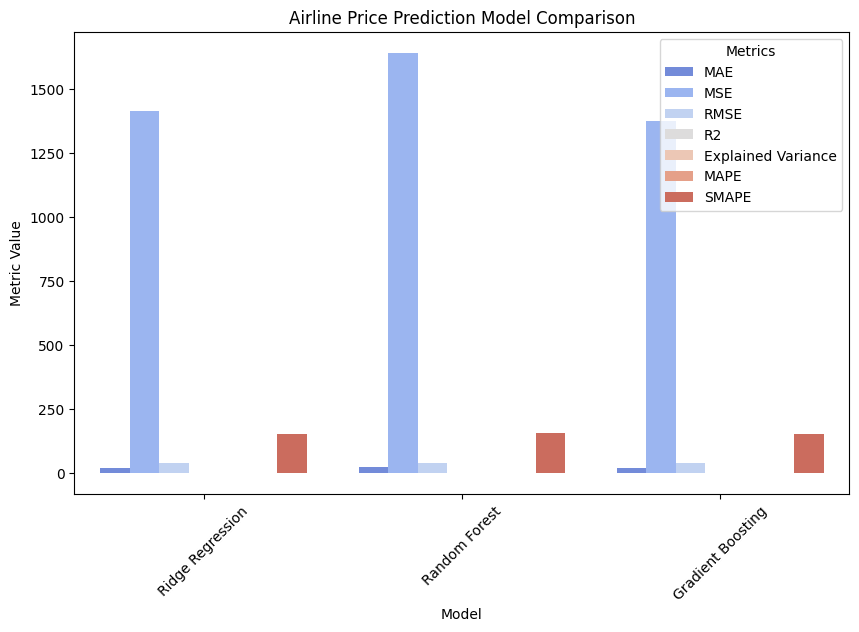

In [3]:
# Install required libraries (Uncomment if running for the first time)
# !pip install pandas numpy scikit-learn matplotlib seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score

# Load dataset (Ensure 'airline_data.csv' is uploaded in Google Colab)
df = pd.read_csv('/content/airline_recommendation[1].csv')

# Display dataset overview
print("Dataset Overview:\n", df.head())

# Feature Selection (Ensure selected columns exist in dataset)
features = ["Flight Distance", "Seat comfort", "Departure/Arrival time convenient", "Inflight wifi service", "On-board service"]
target = "Departure Delay in Minutes"

if not all(feature in df.columns for feature in features + [target]):
    raise ValueError("One or more selected features/target are missing from dataset.")

X = df[features]
y = df[target]

# Splitting Data (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing Data for Ridge Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Models Initialization
ridge = Ridge(alpha=1.0)
rf = RandomForestRegressor(n_estimators=100, random_state=42)
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Training Models
ridge.fit(X_train_scaled, y_train)
rf.fit(X_train, y_train)
gbr.fit(X_train, y_train)

# Predictions
y_pred_ridge = ridge.predict(X_test_scaled)
y_pred_rf = rf.predict(X_test)
y_pred_gbr = gbr.predict(X_test)

# Evaluation Metrics Function
def evaluate_model(y_test, y_pred, model_name):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    explained_var = explained_variance_score(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    smape = np.mean(2 * np.abs(y_test - y_pred) / (np.abs(y_test) + np.abs(y_pred))) * 100

    print(f"\n🔹 {model_name} Performance Metrics:")
    print(f"  - Mean Absolute Error (MAE): {mae:.2f}")
    print(f"  - Mean Squared Error (MSE): {mse:.2f}")
    print(f"  - Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"  - R² Score: {r2:.4f}")
    print(f"  - Explained Variance Score: {explained_var:.4f}")
    print(f"  - Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
    print(f"  - Symmetric Mean Absolute Percentage Error (SMAPE): {smape:.2f}%")

    return {"Model": model_name, "MAE": mae, "MSE": mse, "RMSE": rmse, "R2": r2, "Explained Variance": explained_var, "MAPE": mape, "SMAPE": smape}

# Evaluate Models
results_ridge = evaluate_model(y_test, y_pred_ridge, "Ridge Regression")
results_rf = evaluate_model(y_test, y_pred_rf, "Random Forest")
results_gbr = evaluate_model(y_test, y_pred_gbr, "Gradient Boosting")

# Compare Models
models_df = pd.DataFrame([results_ridge, results_rf, results_gbr])
print("\n🔹 Model Comparison:\n", models_df)

# Visualizing Model Performance
plt.figure(figsize=(10,6))
sns.barplot(data=models_df.melt(id_vars=["Model"]), x="Model", y="value", hue="variable", palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Airline Price Prediction Model Comparison")
plt.ylabel("Metric Value")
plt.legend(title="Metrics", loc="upper right")
plt.show()